In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('salary.csv')

In [2]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
dataset.shape


(35, 2)

In [4]:
x = dataset.drop(['Salary'],axis = True)
y = dataset['Salary']

In [5]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28, 1), (7, 1), (28,), (7,))

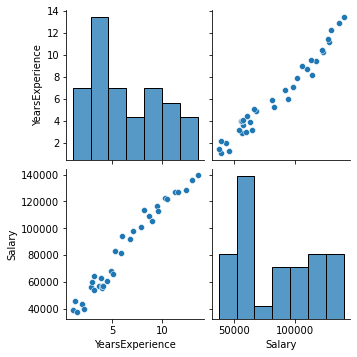

In [23]:
sns.pairplot(dataset)

<function matplotlib.pyplot.show(close=None, block=None)>

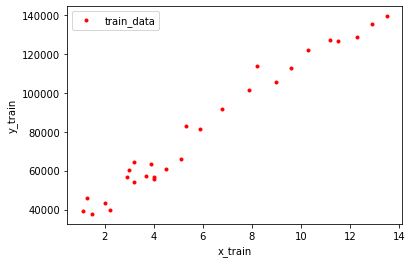

In [9]:
plt.plot(x_train,y_train,'r.',label='train_data')
plt.legend()
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

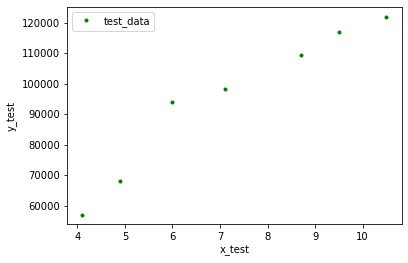

In [10]:
plt.plot(x_test,y_test,'g.',label='test_data')
plt.legend()
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(x_test)

In [13]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns= ["Original Salary","Predict Salary"])

In [14]:
calculation

,Original Salary,Predict Salary
0,116969.0,110576.917063
1,57081.0,64251.572689
2,109431.0,103713.903082
3,98273.0,89987.875119
4,67938.0,71114.586670
5,121872.0,119155.684540
6,93940.0,80551.230895


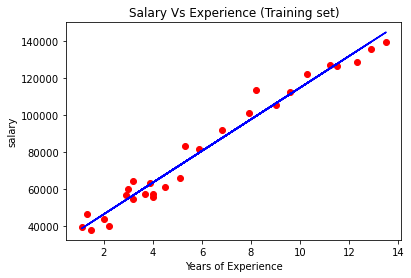

In [15]:
#visualizing training set 
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train),color='blue')
plt.title('Salary Vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('salary')
plt.show()

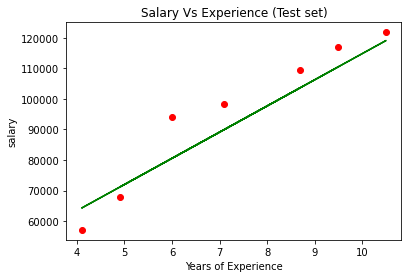

In [16]:
#visualizing test set
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test),color='green')
plt.title('Salary Vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('salary')
plt.show()

In [17]:
regressor.predict([[11]])

array([123445.06827795])

In [18]:
regressor.predict([[7]])

array([89129.99837121])

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8914234140042779

In [20]:
accuracy = regressor.score(x_test,y_test)
print(accuracy*100,'%')

89.1423414004278 %


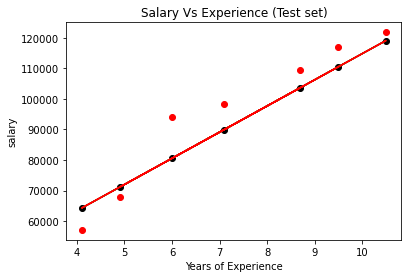

In [21]:
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test),color='green')
plt.plot(x_test,regressor.predict(x_test),color='red',label='predictions')
plt.title('Salary Vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('salary')
plt.scatter(x_test,y_pred, color = 'black')
plt.show()